## Modelling On The Entire City

In [93]:
# Import packages
# Data Cleaning
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans #For KMeans
from sklearn.cluster import AgglomerativeClustering #hierarchy
import scipy.cluster.hierarchy as sch #hierarchy
from sklearn.cluster import DBSCAN #DBSCAN
%matplotlib inline

# Dimensionality Reduction
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [94]:
# Load dataset
nyc = pd.read_csv('clean_data/clustering_data.csv')

In [95]:
# Load dataset
nyc_geo = pd.read_csv('clean_data/nyc_geo_housing_cleaned.csv')

In [96]:
nyc_geo.head()

,Borough,Neighbourhood,Latitude,Longitude,Median_Cost_Per_Studio,Median_Cost_Per_1_Bed,Median_Cost_Per_2_Bed,Avg_Cost_Per_Studio,Avg_Cost_Per_1_Bed,Avg_Cost_Per_2_Bed,Avg_Cost_Per_3_Bed
0,Bronx,Allerton,40.865788,-73.859319,1850.0,1400.0,1800.0,NaN,NaN,NaN,NaN
1,Staten Island,Annadale,40.538114,-74.178549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Staten Island,Arden Heights,40.549286,-74.185887,NaN,1650.0,2250.0,NaN,NaN,NaN,NaN
3,Staten Island,Arlington,40.635325,-74.165104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Staten Island,Arrochar,40.596313,-74.067124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
nyc.head()

,Borough,Neighbourhood,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count
0,Bronx,Wakefield,40.894705,-73.847201,10466.0,23,741.608696,3.294118,1.454545,0.0,0.0,0.0,0.0,0.0,0.0,8.857143,0.0,0.0
1,Bronx,Co-op City,40.874294,-73.829939,10475.0,25,749.600000,2.882353,1.480000,0.0,0.0,0.0,0.0,0.0,0.0,9.631579,0.0,0.0
2,Bronx,Eastchester,40.887556,-73.827806,10466.0,25,554.440000,3.035948,1.480000,0.0,0.0,0.0,0.0,0.0,0.0,9.166667,0.0,0.0
3,Bronx,Fieldston,40.895437,-73.905643,10471.0,25,875.120000,3.274510,1.500000,0.0,0.0,0.0,0.0,0.0,0.0,13.076923,0.0,0.0
4,Bronx,Riverdale,40.890834,-73.912585,10463.0,25,633.560000,3.431373,1.560000,0.0,0.0,0.0,0.0,0.0,0.0,20.091667,0.0,0.0


## Clustering On Different Factors
- restaurant features
- Uber Features
- location
- rats
- rats & restaurants

In [98]:
# Numerical encoding of all categorical (nominal) variables
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

In [99]:
# Encode Boroughs feature
Borough_Labels = gle.fit_transform(nyc['Borough'])
Borough_mappings = {index: label for index, label in enumerate(gle.classes_)}
nyc['Borough_Label'] = Borough_Labels

# Encode Neighbourhood feature
Neighbourhood_Labels = gle.fit_transform(nyc['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
nyc['Neighbourhood_Label'] = Neighbourhood_Labels

In [100]:
nyc.drop(columns=['Borough','Neighbourhood'], inplace=True)

In [101]:
# Restaurant Features
nyc_resto = nyc[['Borough_Label','Neighbourhood_Label','Restaurant_Count_Name','Restaurant_Mean_Distance (m)','Restaurant_Mean_Rating',
                       'Restaurant_Mean_Price','Restaurant_Sum_Reviews']]

In [102]:
# Transportation Features
nyc_uber = nyc[['Borough_Label','Neighbourhood_Label','Transit_Count_Name','Uber_Sum_Ride Count','Uber_Mean_Ride Count']]

In [103]:
# Location Only
nyc_loc = nyc[['Borough_Label','Neighbourhood_Label','Latitude','Longitude','Zipcode']]

In [104]:
# Rats
nyc_rats = nyc[['Borough_Label','Neighbourhood_Label','Rat_Mean_Case Open?','Rat_Mean_Days Complaint Open']]

In [105]:
# Rats & Restaurants
nyc_restorat = nyc[['Borough_Label','Neighbourhood_Label','Rat_Mean_Case Open?','Rat_Mean_Days Complaint Open','Restaurant_Count_Name','Restaurant_Mean_Distance (m)','Restaurant_Mean_Rating',
                       'Restaurant_Mean_Price','Restaurant_Sum_Reviews']]

In [106]:
# POIs
nyc_pois = nyc[['Borough_Label','Neighbourhood_Label','Restaurant_Count_Name','School_Count_Name',
                'Park_Count_Name','Transit_Count_Name','Grocery_Count_Name']]

In [107]:
# Scale all feautures for PCA computation
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

In [108]:
nyc_test = nyc.drop(columns=['Latitude','Longitude','Zipcode'])

# Restaurants

In [109]:
resto_scaled = pd.DataFrame(n_scaler.fit_transform(nyc_resto), columns=nyc_resto.columns)

### Applying PCA

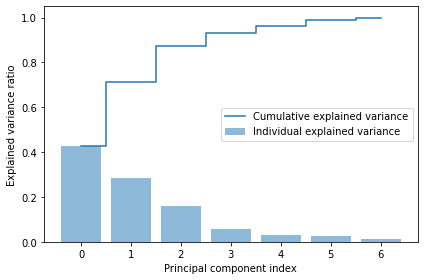

In [110]:
#scree plot
pca = PCA()

# Determine transformed features

data_pca = pca.fit_transform(resto_scaled)

# Determine explained variance using explained_variance_ration_ attribute

exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [111]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [112]:
# Starting with restaurants
df_pca = apply_pca(resto_scaled, 4)

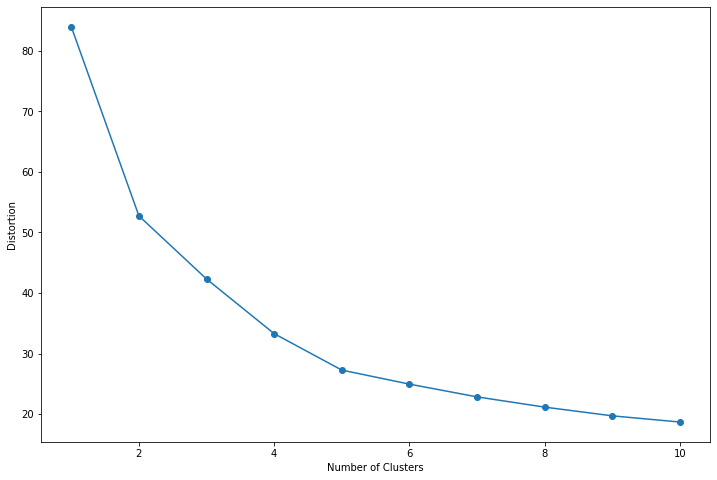

In [113]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [114]:
# 2 clusters?
X = df_pca

# K-Means
km = KMeans(n_clusters=2, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 3
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

In [115]:
# plotting function

def plot_clusters(X,y_res, plt_cluster_centers = True):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

## K-Means

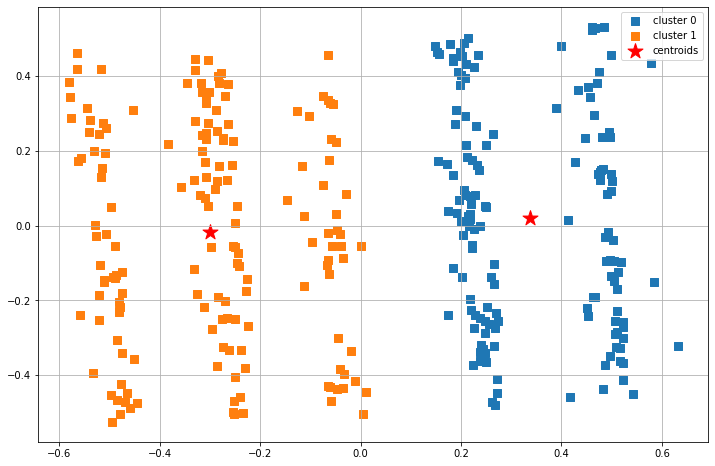

In [116]:
plot_clusters(np.array(df_pca), y_km)

## Hierarchical

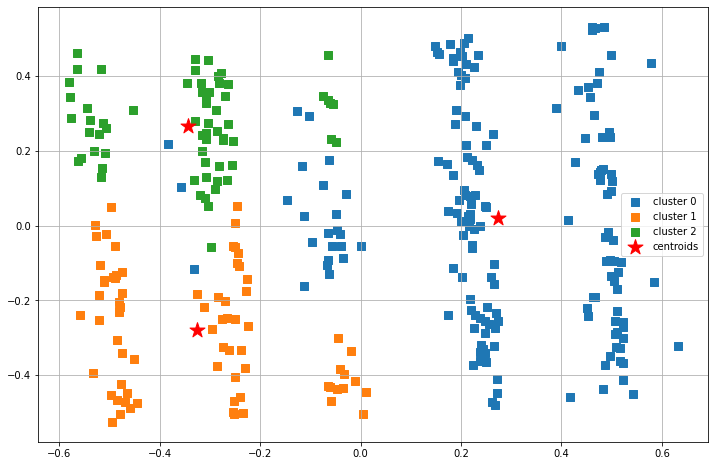

In [117]:
plot_clusters(np.array(X), y_ac)

## DBSCAN

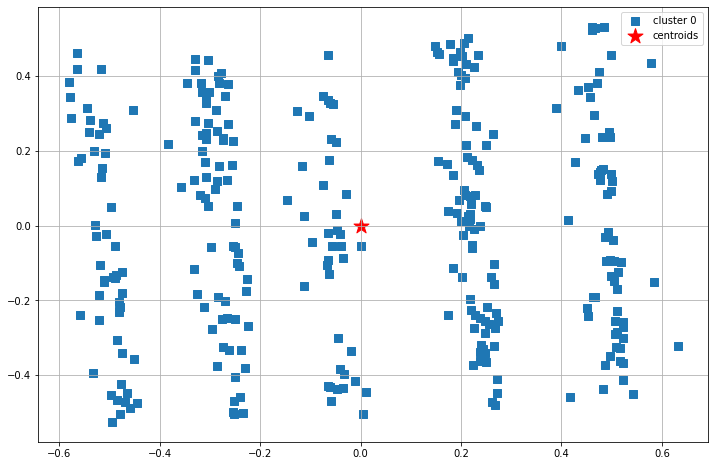

In [118]:
plot_clusters(np.array(X), y_db)

In [119]:
# Calculate silhoutte score of k-means clustering
score = metrics.silhouette_score(X, km.labels_, metric='euclidean')

# Print score to 3 decimal places
print('K-Means Silhouette Score: %.3f' % score)

# Calculate silhoutte score of hierarchical clustering
score = metrics.silhouette_score(X, ac.labels_, metric='euclidean')

# Print score to 3 decimal places
print('Hierarchical Silhouette Score: %.3f' % score)

# Calculate silhoutte score of DBSCAN clustering
#score = metrics.silhouette_score(X, db.labels_, metric='euclidean')

# Print score to 3 decimal places
#print('DBSCAN Silhouette Score: %.3f' % score)
print('DBSCAN did not give us any clusters :(')

K-Means Silhouette Score: 0.344
Hierarchical Silhouette Score: 0.293
DBSCAN did not give us any clusters :(


In [120]:
## K-Means was best!

In [121]:
nyc['resto_cluster'] = y_km

# Transportation

In [122]:
uber_scaled = pd.DataFrame(s_scaler.fit_transform(nyc_uber), columns=nyc_uber.columns)

## Applying PCA

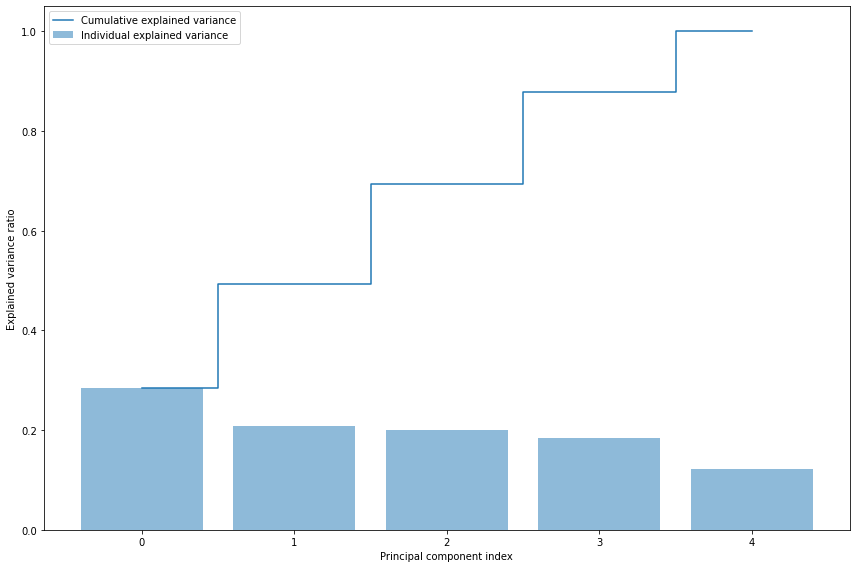

In [123]:
#scree plot
pca = PCA()

# Determine transformed features

data_pca = pca.fit_transform(uber_scaled)

# Determine explained variance using explained_variance_ration_ attribute

exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [124]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [125]:
df_pca = apply_pca(uber_scaled, 5)

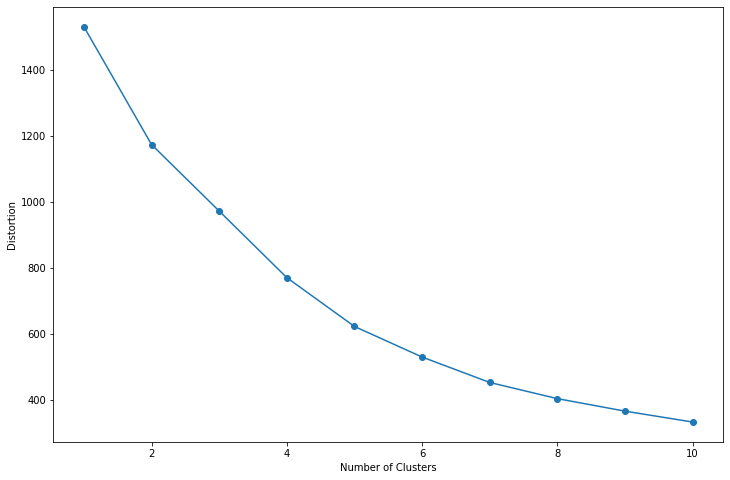

In [126]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [127]:
# 5 clusters?
X = df_pca

# K-Means
km = KMeans(n_clusters=5, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=5)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 5
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

### K-Means

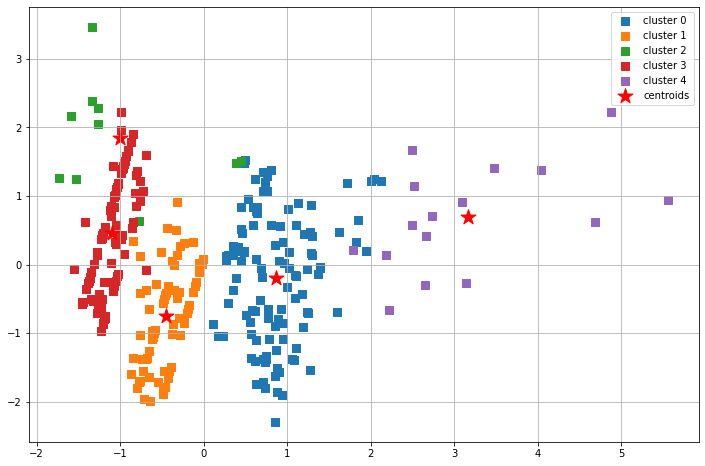

In [128]:
plot_clusters(np.array(df_pca), y_km)

### Hierarchical

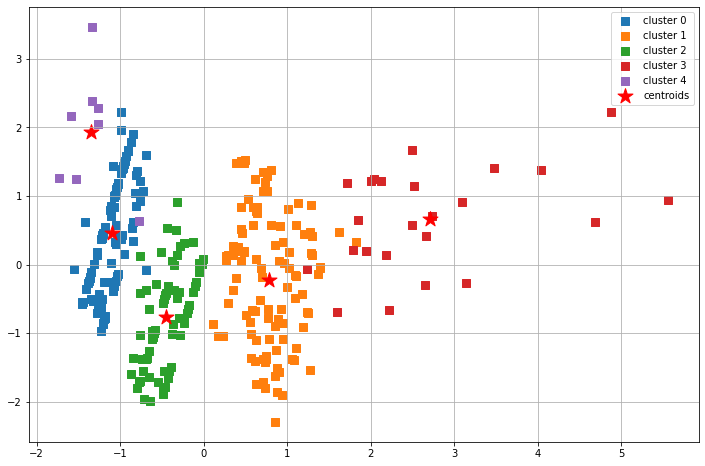

In [129]:
plot_clusters(np.array(X), y_ac)

### DBSCAN

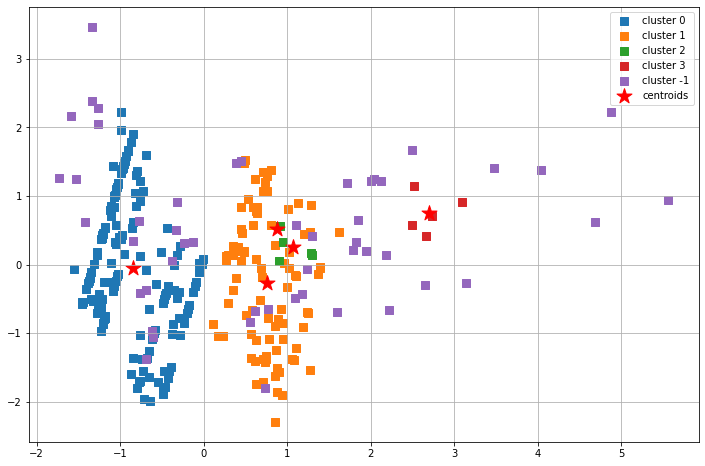

In [130]:
plot_clusters(np.array(X), y_db)

In [131]:
# Calculate silhoutte score of k-means clustering
score = metrics.silhouette_score(X, km.labels_, metric='euclidean')

# Print score to 3 decimal places
print('K-Means Silhouette Score: %.4f' % score)

# Calculate silhoutte score of hierarchical clustering
score = metrics.silhouette_score(X, ac.labels_, metric='euclidean')

# Print score to 3 decimal places
print('Hierarchical Silhouette Score: %.4f' % score)

# Calculate silhoutte score of DBSCAN clustering
score = metrics.silhouette_score(X, db.labels_, metric='euclidean')

# Print score to 3 decimal places
print('DBSCAN Silhouette Score: %.4f' % score)

K-Means Silhouette Score: 0.3490
Hierarchical Silhouette Score: 0.3476
DBSCAN Silhouette Score: 0.1365


In [132]:
# kmeans wins again!

In [133]:
nyc['Transport_Cluster'] = y_km

# Locations

In [134]:
loc_scaled = pd.DataFrame(s_scaler.fit_transform(nyc_loc), columns=nyc_loc.columns)

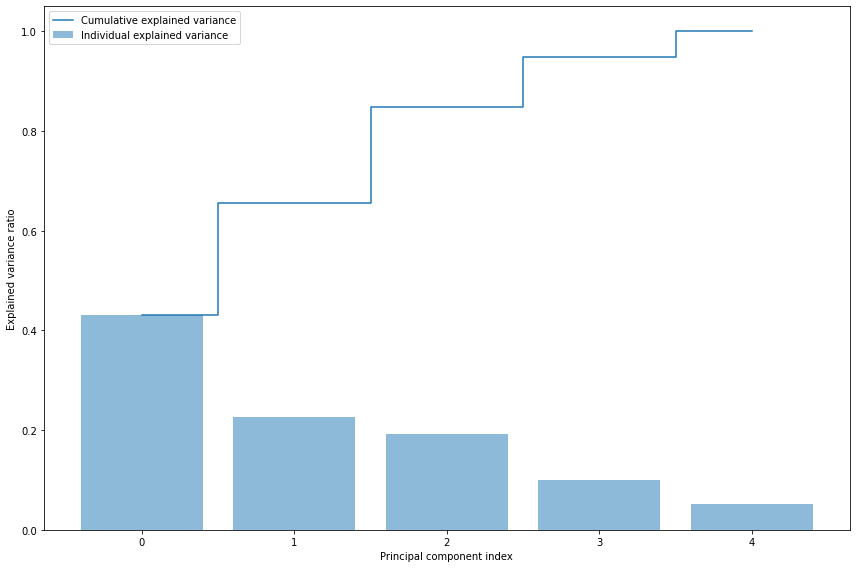

In [135]:
#scree plot
pca = PCA()

# Determine transformed features

data_pca = pca.fit_transform(loc_scaled)

# Determine explained variance using explained_variance_ration_ attribute

exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [136]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [137]:
df_pca = apply_pca(loc_scaled, 5)

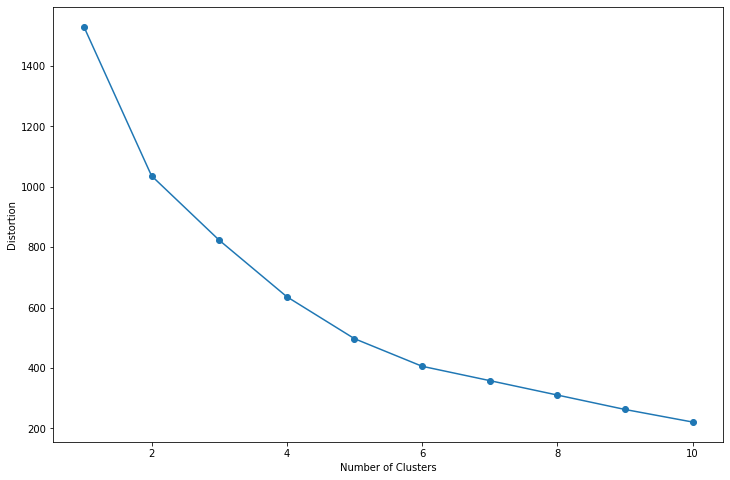

In [138]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [139]:
# 2 clusters?
X = df_pca

# K-Means
km = KMeans(n_clusters=2, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=2)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 2
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

### KMeans

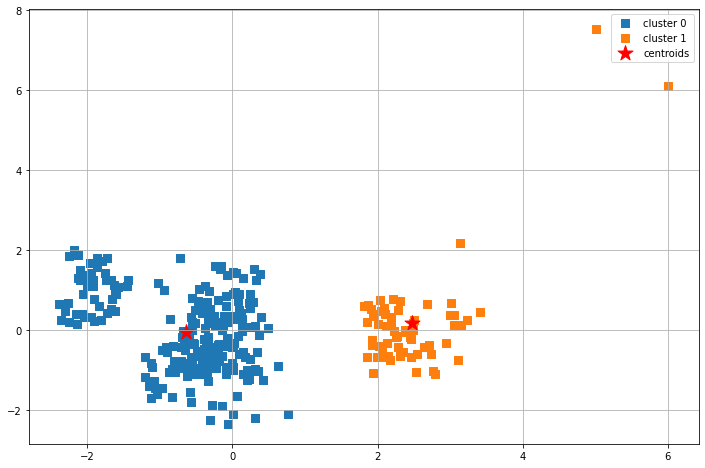

In [140]:
plot_clusters(np.array(df_pca), y_km)

### Hierarchical

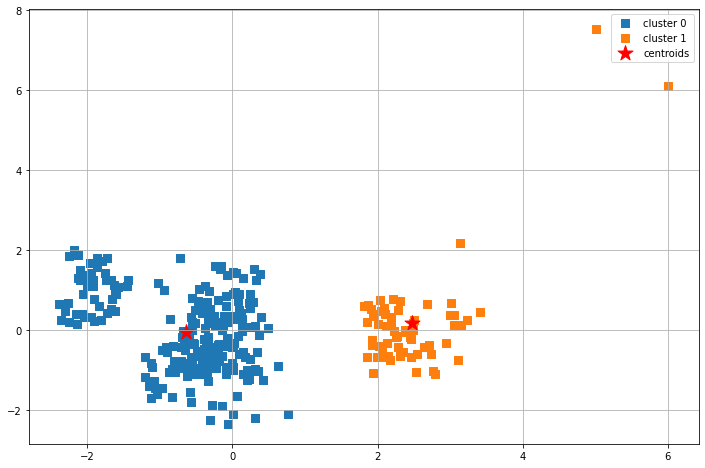

In [141]:
plot_clusters(np.array(X), y_ac)

### DBSCAN

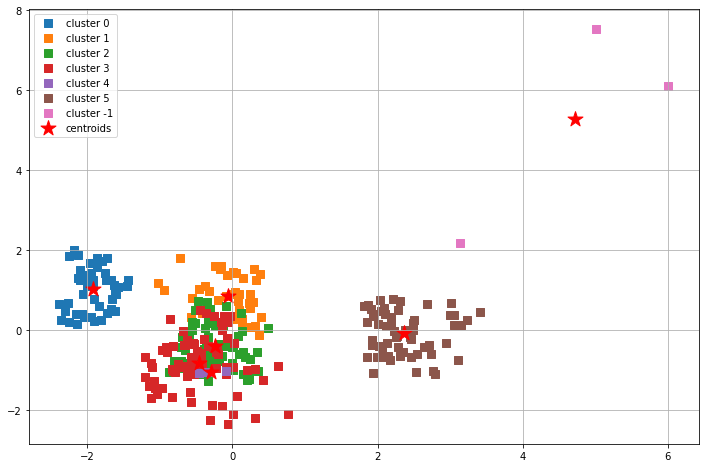

In [142]:
plot_clusters(np.array(X), y_db)

In [143]:
# Calculate silhoutte score of k-means clustering
score = metrics.silhouette_score(X, km.labels_, metric='euclidean')

# Print score to 3 decimal places
print('K-Means Silhouette Score: %.5f' % score)

# Calculate silhoutte score of hierarchical clustering
score = metrics.silhouette_score(X, ac.labels_, metric='euclidean')

# Print score to 3 decimal places
print('Hierarchical Silhouette Score: %.5f' % score)

# Calculate silhoutte score of DBSCAN clustering
score = metrics.silhouette_score(X, db.labels_, metric='euclidean')

# Print score to 3 decimal places
print('DBSCAN Silhouette Score: %.5f' % score)

K-Means Silhouette Score: 0.40333
Hierarchical Silhouette Score: 0.40333
DBSCAN Silhouette Score: 0.32188


In [144]:
nyc['Location_Cluster'] = y_km

In [ ]:
# KMeans and hierarchical perfromed equally well

# Rats & Restaurants

In [145]:
restorat_scaled = pd.DataFrame(r_scaler.fit_transform(nyc_restorat), columns=nyc_restorat.columns)

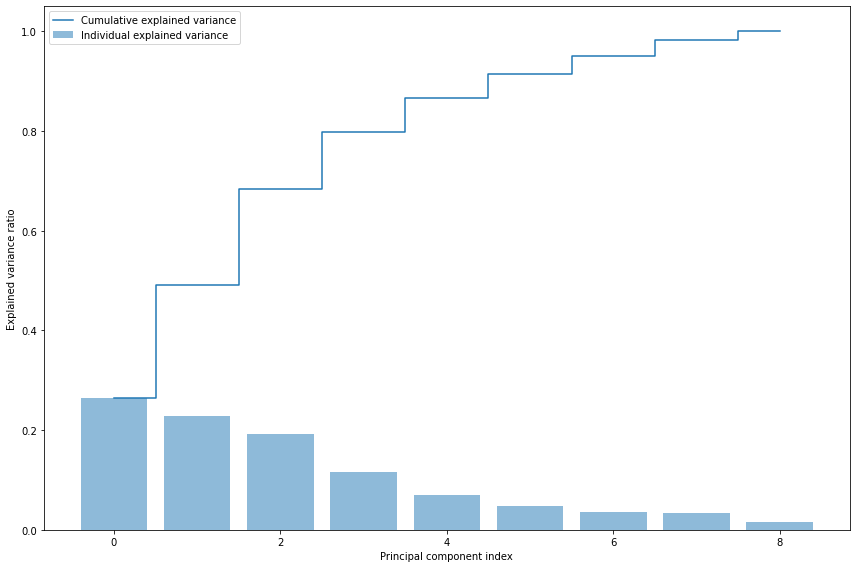

In [146]:
#scree plot
pca = PCA()

# Determine transformed features

data_pca = pca.fit_transform(restorat_scaled)

# Determine explained variance using explained_variance_ration_ attribute

exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [147]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [148]:
df_pca = apply_pca(restorat_scaled, 5)

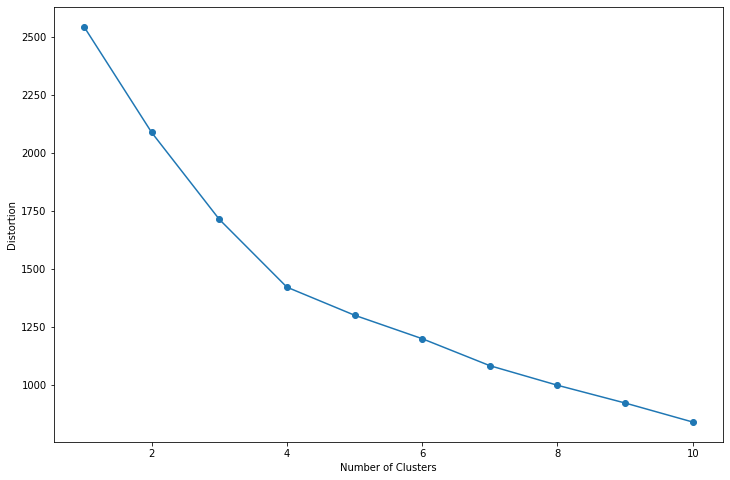

In [149]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [150]:
# 4 clusters?
X = df_pca

# K-Means
km = KMeans(n_clusters=4, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=4)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 4
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

### K-Means

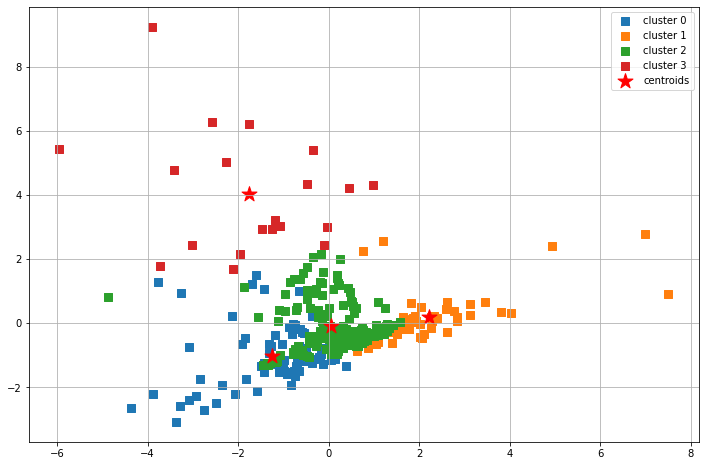

In [151]:
plot_clusters(np.array(df_pca), y_km)

### Hierarchical

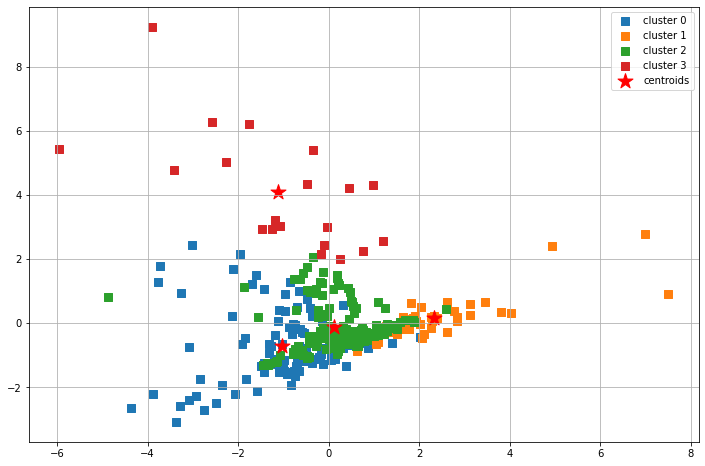

In [152]:
plot_clusters(np.array(X), y_ac)

### DBSCAN

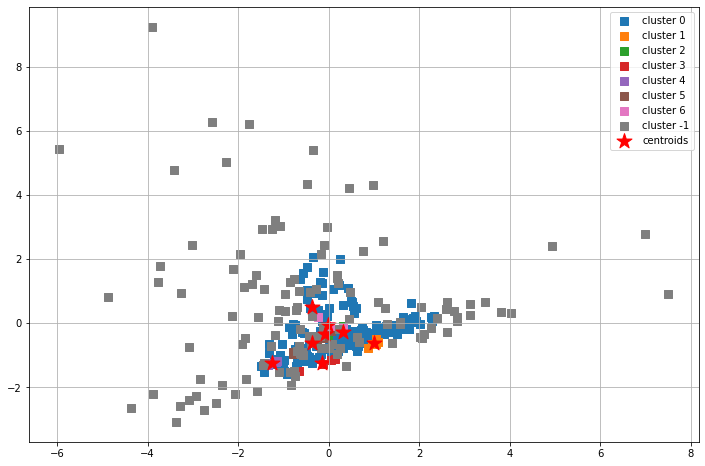

In [153]:
plot_clusters(np.array(X), y_db)

In [154]:
# Calculate silhoutte score of k-means clustering
score = metrics.silhouette_score(X, km.labels_, metric='euclidean')

# Print score to 3 decimal places
print('K-Means Silhouette Score: %.3f' % score)

# Calculate silhoutte score of hierarchical clustering
score = metrics.silhouette_score(X, ac.labels_, metric='euclidean')

# Print score to 3 decimal places
print('Hierarchical Silhouette Score: %.3f' % score)

# Calculate silhoutte score of DBSCAN clustering
score = metrics.silhouette_score(X, db.labels_, metric='euclidean')

# Print score to 3 decimal places
print('DBSCAN Silhouette Score: %.3f' % score)

K-Means Silhouette Score: 0.238
Hierarchical Silhouette Score: 0.205
DBSCAN Silhouette Score: -0.198


In [ ]:
# KMeans performed the best

In [155]:
nyc['Resto_Rat_Cluster'] = y_km

# POIs

In [156]:
pois_scaled = pd.DataFrame(n_scaler.fit_transform(nyc_pois), columns=nyc_pois.columns)

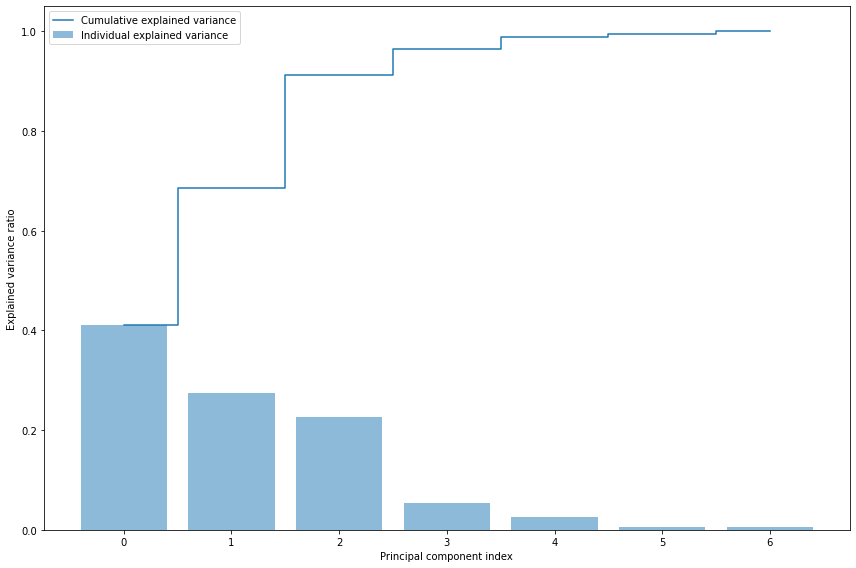

In [157]:
#scree plot
pca = PCA()

# Determine transformed features

data_pca = pca.fit_transform(pois_scaled)

# Determine explained variance using explained_variance_ration_ attribute

exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [158]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [159]:
df_pca = apply_pca(pois_scaled, 3)

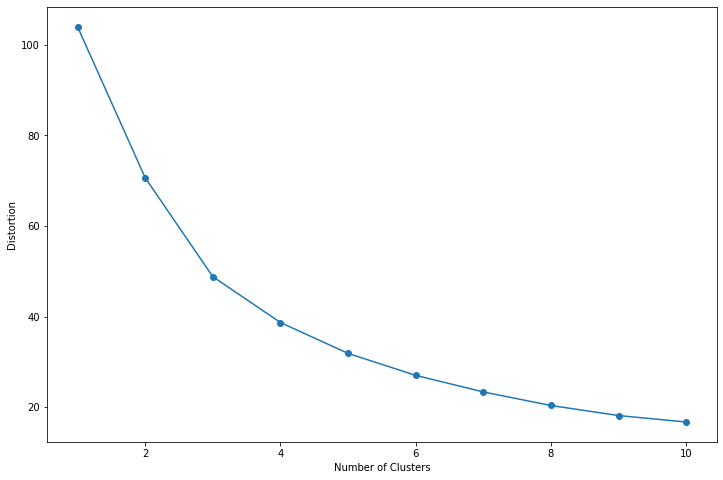

In [160]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [161]:
# 3 clusters?
X = df_pca

# K-Means
km = KMeans(n_clusters=3, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 4
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

### K-Means

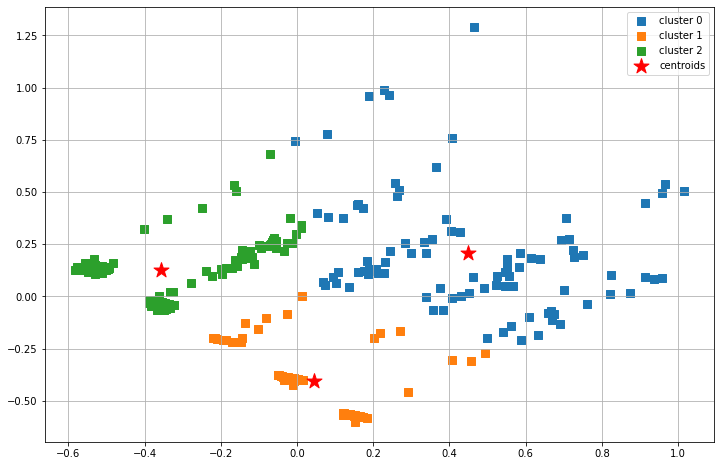

In [162]:
plot_clusters(np.array(df_pca), y_km)

### Hierarchical

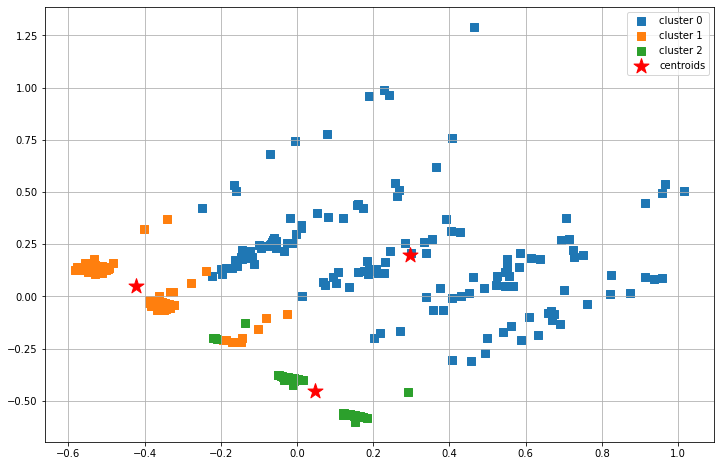

In [163]:
plot_clusters(np.array(X), y_ac)

### DBSCAN

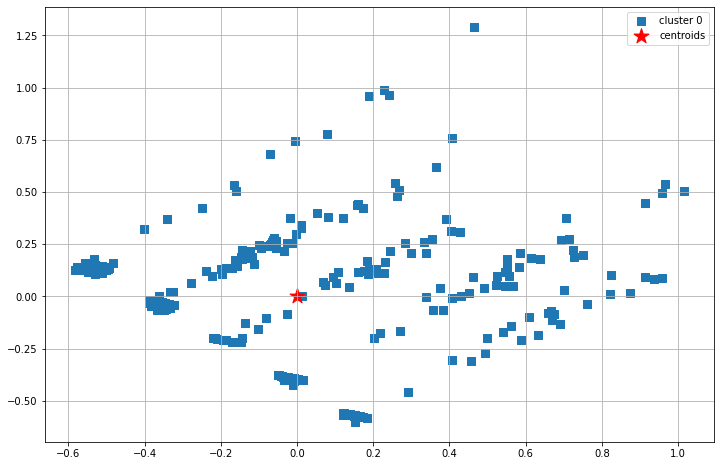

In [164]:
plot_clusters(np.array(X), y_db)

In [165]:
# Calculate silhoutte score of k-means clustering
score = metrics.silhouette_score(X, km.labels_, metric='euclidean')

# Print score to 3 decimal places
print('K-Means Silhouette Score: %.3f' % score)

# Calculate silhoutte score of hierarchical clustering
score = metrics.silhouette_score(X, ac.labels_, metric='euclidean')

# Print score to 3 decimal places
print('Hierarchical Silhouette Score: %.3f' % score)

# Calculate silhoutte score of DBSCAN clustering
#score = metrics.silhouette_score(X, db.labels_, metric='euclidean')

# Print score to 3 decimal places
#print('DBSCAN Silhouette Score: %.3f' % score)

K-Means Silhouette Score: 0.356
Hierarchical Silhouette Score: 0.314


In [ ]:
# KMeans performed the best

In [166]:
nyc['POI_Cluster'] = y_km

In [167]:
nyc

,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,...,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label,resto_cluster,Transport_Cluster,Location_Cluster,Resto_Rat_Cluster,POI_Cluster
0,40.894705,-73.847201,10466.0,23,741.608696,3.294118,1.454545,0.0,0.0,0.0,...,8.857143,0.0,0.0,0,283,1,1,0,2,1
1,40.874294,-73.829939,10475.0,25,749.600000,2.882353,1.480000,0.0,0.0,0.0,...,9.631579,0.0,0.0,0,59,1,1,0,2,1
2,40.887556,-73.827806,10466.0,25,554.440000,3.035948,1.480000,0.0,0.0,0.0,...,9.166667,0.0,0.0,0,83,1,1,0,2,1
3,40.895437,-73.905643,10471.0,25,875.120000,3.274510,1.500000,0.0,0.0,0.0,...,13.076923,0.0,0.0,0,94,1,1,0,2,1
4,40.890834,-73.912585,10463.0,25,633.560000,3.431373,1.560000,0.0,0.0,0.0,...,20.091667,0.0,0.0,0,233,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,40.756658,-74.000111,10001.0,62,1964.460545,4.201139,1.915254,62690.0,28.0,28.0,...,12.623656,26.0,1.0,2,135,1,0,0,0,0
302,40.587338,-73.805530,11693.0,58,631.065083,3.894377,1.408163,9496.0,11.0,17.0,...,20.129032,1.0,1.0,3,125,0,0,0,1,2
303,40.611322,-73.765968,11691.0,48,530.510716,3.615948,1.153846,5916.0,32.0,18.0,...,8.900000,0.0,0.0,3,15,0,3,0,2,0
304,40.756091,-73.945631,11101.0,101,860.361630,4.024837,1.852273,41362.0,48.0,36.0,...,6.434783,1.0,1.0,3,223,0,2,0,3,0


In [168]:
nyc.replace({'Neighbourhood_Label': Neighbourhood_mappings}, inplace=True)

In [169]:
nyc.replace({'Borough_Label': Borough_mappings}, inplace=True)

In [170]:
nyc

,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,...,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label,resto_cluster,Transport_Cluster,Location_Cluster,Resto_Rat_Cluster,POI_Cluster
0,40.894705,-73.847201,10466.0,23,741.608696,3.294118,1.454545,0.0,0.0,0.0,...,8.857143,0.0,0.0,Bronx,Wakefield,1,1,0,2,1
1,40.874294,-73.829939,10475.0,25,749.600000,2.882353,1.480000,0.0,0.0,0.0,...,9.631579,0.0,0.0,Bronx,Co-op City,1,1,0,2,1
2,40.887556,-73.827806,10466.0,25,554.440000,3.035948,1.480000,0.0,0.0,0.0,...,9.166667,0.0,0.0,Bronx,Eastchester,1,1,0,2,1
3,40.895437,-73.905643,10471.0,25,875.120000,3.274510,1.500000,0.0,0.0,0.0,...,13.076923,0.0,0.0,Bronx,Fieldston,1,1,0,2,1
4,40.890834,-73.912585,10463.0,25,633.560000,3.431373,1.560000,0.0,0.0,0.0,...,20.091667,0.0,0.0,Bronx,Riverdale,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,40.756658,-74.000111,10001.0,62,1964.460545,4.201139,1.915254,62690.0,28.0,28.0,...,12.623656,26.0,1.0,Manhattan,Hudson Yards,1,0,0,0,0
302,40.587338,-73.805530,11693.0,58,631.065083,3.894377,1.408163,9496.0,11.0,17.0,...,20.129032,1.0,1.0,Queens,Hammels,0,0,0,1,2
303,40.611322,-73.765968,11691.0,48,530.510716,3.615948,1.153846,5916.0,32.0,18.0,...,8.900000,0.0,0.0,Queens,Bayswater,0,3,0,2,0
304,40.756091,-73.945631,11101.0,101,860.361630,4.024837,1.852273,41362.0,48.0,36.0,...,6.434783,1.0,1.0,Queens,Queensbridge,0,2,0,3,0


In [171]:
nyc_final = nyc_geo.merge(nyc, left_on=['Neighbourhood','Borough'], right_on=['Neighbourhood_Label','Borough_Label'], how='right')

In [172]:
nyc_final.drop(columns=['Neighbourhood_Label','Borough_Label'], inplace=True)

In [173]:
# exporting to csv
nyc_final.to_csv('nyc_final_features.csv', index=False)